# Time normalization

This example shows how to perform a temporal normalization of traces with different methods. These methods are described in the paper from [Bensen et al. (2007)](https://scholar.google.fr/scholar?q=bensen+et+al+2007&hl=fr&as_sdt=0&as_vis=1&oi=scholart), and a ubiquitous in ambient noise seismology to mitigate the effect of localized seismic sources that may bias the analysis of cross-correlation functions.

In [1]:
import matplotlib.pyplot as plt

import covseisnet as csn

## Read waveforms

This section reads an [example stream of seismic data shipped with Obspy](https://docs.obspy.org/packages/autogen/obspy.core.stream.read.html). The stream contains three traces, which are highpass at a very high frequency to see more details in the synchronization.

In [2]:
# Read the example stream. Using the read method without arguments reads the
# example stream shipped with Obspy.
stream = csn.read()

# Highpass filter the stream for a better illustration
stream.filter("highpass", freq=1)

# Print the stream
print(stream)

3 Trace(s) in NetworkStream (synced):
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


## Normalization methods

We here show the trace normalized with different methods, namely a one-bit normalization, and a smooth envelope removal technique. The methods are applied to the stream, and the normalized traces are stored in a list. Considering the seismic trace $x(t)$ the normalized trace $\hat x(t)$ is obtained with

$$\hat x(t) = \frac{x(t)}{\mathcal{A}x(t) + \epsilon}$$

where $A$ is an operator applied to the trace $x(t)$, and $\epsilon > 0$ is a regularization value to avoid division by 0. The operator $\mathcal{A}$ is defined by the ``method`` parameter. We distinguish two cases:

- If the ``method`` parameter is set to ``"onebit"``, the operator
    $\mathcal{A}$ is defined as $\mathcal{A}x(t) = |x(t)|$, and therefore

    $$ \hat x(t) = \frac{x(t)}{|x(t)| + \epsilon} \approx \text{sign}(x(t)) $$

    In this case, the method calls the `covseisnet.signal.modulus_division`

- If the ``method`` parameter is set to ``"smooth"``, the operator $\mathcal{A}$ is defined as a [Savitzky-Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter) applied to the Hilbert envelope of the trace. The Savitzky-Golay filter is defined by the ``smooth_length`` and ``smooth_order`` parameters. 

In [3]:
# Initialize the list of normalized streams
normalization_methods = ["onebit", "smooth"]
normalized_streams = []

# Normalize the stream with the different methods
for method in normalization_methods:
    normalized_stream = stream.copy()
    normalized_stream.time_normalize(method=method)
    normalized_streams.append(normalized_stream)

## Comparison

This section compares the original stream with the normalized streams. The
traces are plotted in a figure, where the original stream is plotted first,
and the normalized streams are plotted below.



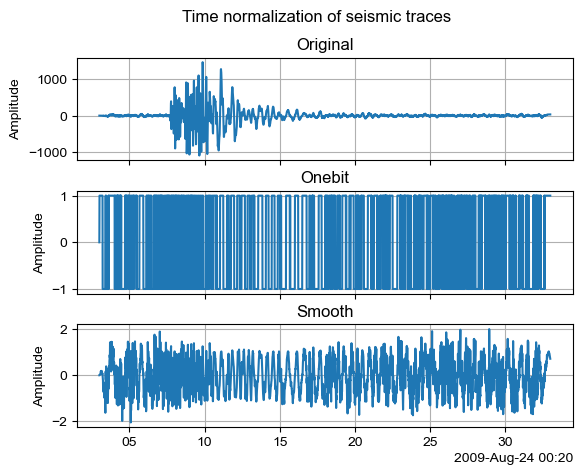

In [4]:
# Concatenate the original stream with the normalized streams
streams = [stream] + normalized_streams
labels = ["original"] + normalization_methods

# Create gigure
fig, axes = plt.subplots(len(streams), sharex=True, gridspec_kw={"hspace": 0.3})

# Plot each case
for ax, stream, label in zip(axes, streams, labels):
    ax.plot(stream.times("matplotlib"), stream.traces[0].data)
    ax.set_title(label.title())
    ax.set_ylabel("Amplitude")
    ax.grid()

# Set the title
fig.suptitle("Time normalization of seismic traces")

# Set the x-axis label
csn.plot.dateticks(axes[-1])